In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.abs(np.sin(x/2))

plt.xlim(-7, 7)
plt.ylim(-1, 3)

x = np.arange(-2, 2, 0.01)
max_value = np.max(f(x))

box_x = np.linspace(-2.5, 2.5, 100)
box_y = np.full_like(box_x, max_value)

plt.plot(box_x, box_y, 'r--')
plt.fill_between(box_x, box_y, f(box_x), where=(box_y > f(box_x)), color='gray', alpha=0.5)
plt.plot(x, f(x))

plt.show()

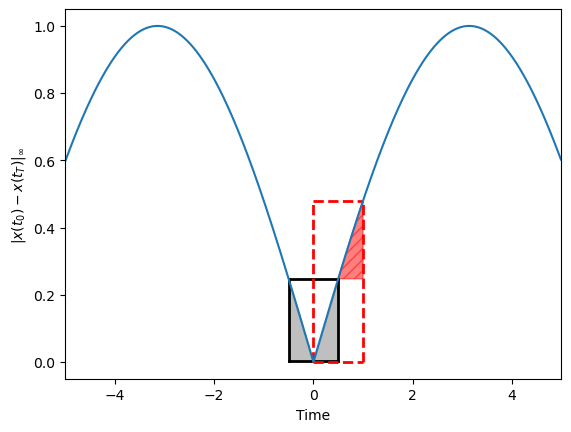

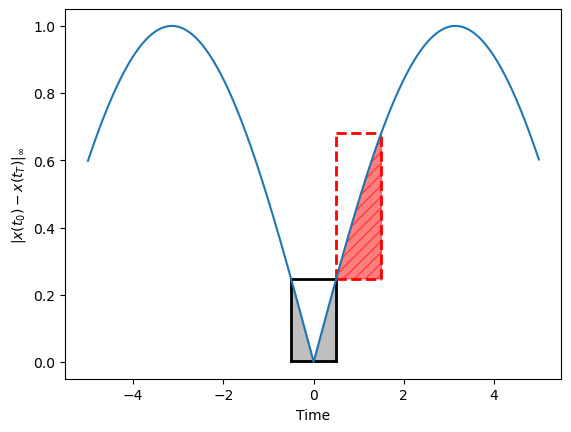

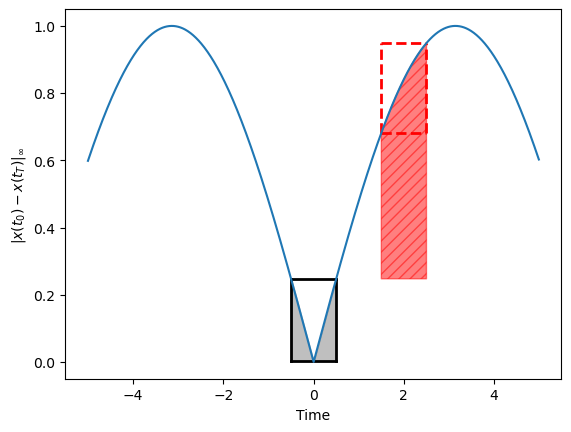

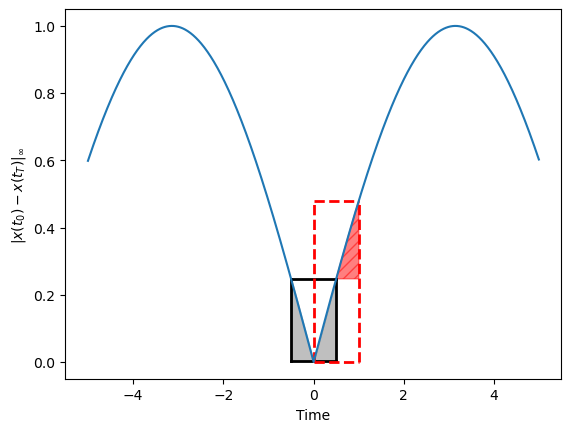

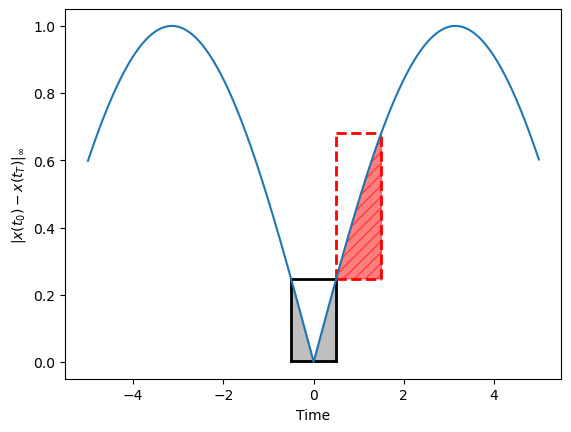

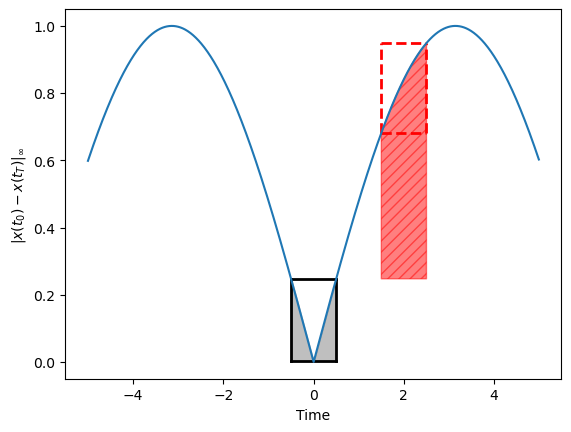

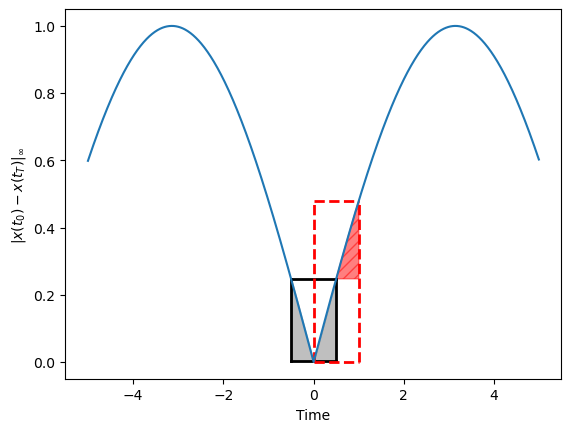

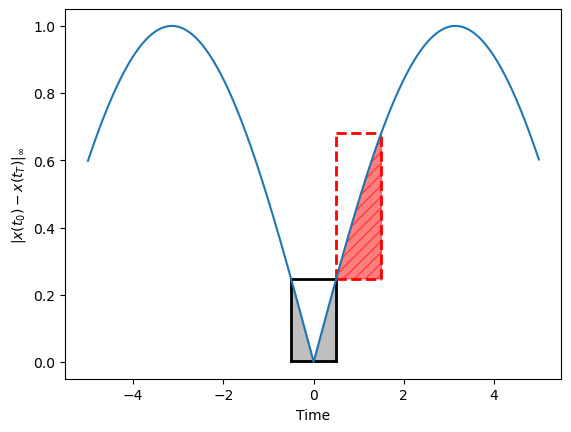

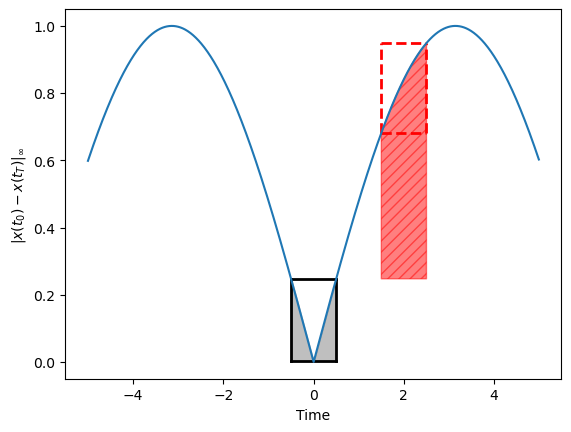

In [124]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.abs(np.sin(x/2))

plt.xlim(-5, 5)  # Adjusted x-axis limits


for input_length in [0.1, 0.5, 1]:
    for pred_horiz in [0.5 , 1, 2]:
        x = np.arange(-input_length, input_length, 0.01)

        box_x = np.linspace(-0.5, 0.5, 100)
        max_value = np.max(f(box_x))

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k-', linewidth=2)  # Top line
        plt.plot([box_x[0], box_x[-1]], [np.min(f(box_x)), np.min(f(box_x))], 'k-', linewidth=2)  # Bottom line
        plt.plot([box_x[0], box_x[0]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Left line
        plt.plot([box_x[-1], box_x[-1]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, np.min(f(box_x)), f(box_x), where=(box_y > f(box_x)), color='gray', alpha=0.5)

        x = np.arange(-5, 5, 0.01)
    
        copy_box_x = np.array(box_x)

        ###############################


        box_x = box_x + pred_horiz
        max_value = np.max(f(box_x))

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'r--', linewidth=2)  # Top line
        plt.plot([box_x[0], box_x[-1]], [np.min(f(box_x)), np.min(f(box_x))], 'r--', linewidth=2)  # Bottom line
        plt.plot([box_x[0], box_x[0]], [np.min(f(box_x)), max_value], 'r--', linewidth=2)  # Left line
        plt.plot([box_x[-1], box_x[-1]], [np.min(f(box_x)), max_value], 'r--', linewidth=2)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, np.max(f(copy_box_x)), f(box_x), where= ((f(box_x) > np.max(f(copy_box_x)))
                                                                 & (f(box_x) > np.max(f(copy_box_x))))
                         , color='red', alpha=0.5, hatch='///')
        
        plt.plot(x, f(x))

        plt.xlabel("Time")
        plt.ylabel(r"$|x(t_0) - x(t_T)|_\infty$")
        plt.show()


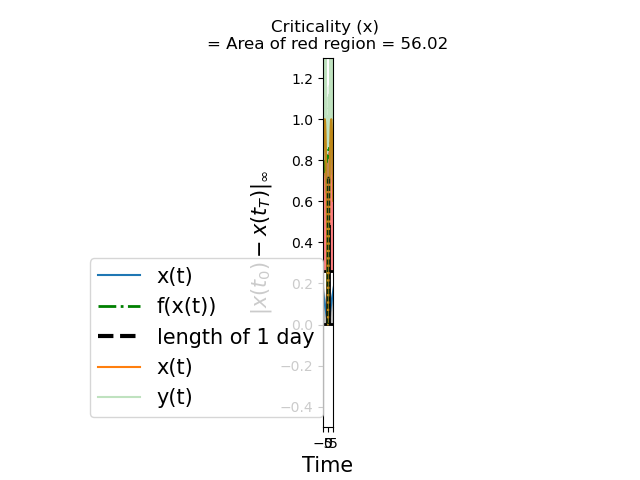

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint

def f(x):
    return np.abs(np.sin(x/2))

def f_shifted(x):
    return np.abs(np.sin(x/2)) * (1 + np.random.sample(f(x).shape) * 0.5)

plt.xlim(-5, 5)  # Adjusted x-axis limits


for input_length in [1]:
    for pred_horiz in [3]:

        box_x = np.linspace(-input_length, input_length, 100)
        max_value = np.max(f(box_x))

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k-', linewidth=2)  # Top line
        plt.plot([box_x[0], box_x[-1]], [np.min(f(box_x)), np.min(f(box_x))], 'k-', linewidth=2)  # Bottom line
        plt.plot([box_x[0], box_x[0]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Left line
        plt.plot([box_x[-1], box_x[-1]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, np.min(f(box_x)), f(box_x), where=(box_y > f(box_x)), color='gray', alpha=0.5)

        x = np.arange(-5, 5, 0.01)
    
        copy_box_x = np.array(box_x)
        plt.plot(x, f(x), label="x(t)")


        ###############################

        box_x = np.linspace(-input_length, input_length, 100)
        f_shifted_box_x = f_shifted(box_x) 
        # sprint(f_shifted_box_x.shape)
        
        max_value = np.max(f_shifted_box_x)

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k--', linewidth=1)  # Top line
        plt.plot([box_x[0], box_x[-1]], [np.min(f_shifted_box_x), np.min(f_shifted_box_x)], 'k--', linewidth=1)  # Bottom line
        plt.plot([box_x[0], box_x[0]], [np.min(f_shifted_box_x), max_value], 'k--', linewidth=1)  # Left line
        plt.plot([box_x[-1], box_x[-1]], [np.min(f_shifted_box_x), max_value], 'k--', linewidth=1)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, np.max(f(box_x)), f_shifted_box_x, where= (np.max(f(box_x)) < f_shifted_box_x), color='red', alpha=0.5)

        x = np.arange(-5, 5, 0.01)
    
        plt.plot(x, f_shifted(x), label="y(t)", alpha=0.3)

        plt.xlabel("Time")
        plt.ylabel(r"$|x(t_0) - x(t_T)|_\infty$", fontsize=15)
        plt.legend(loc=4, fontsize=15)
        plt.savefig("csr_with_noise.png", dpi=600)
        plt.show()


f_shifted_box_x.shape : (100,)


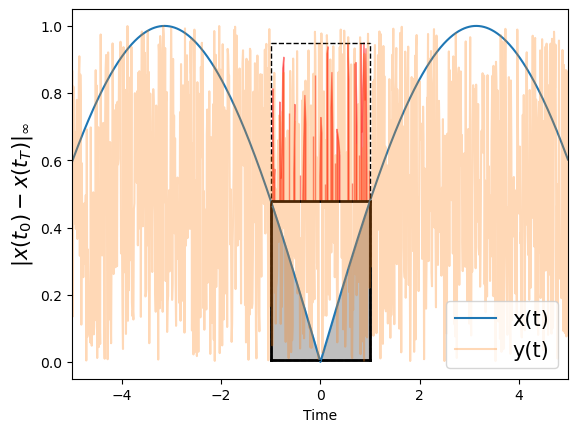

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint

def f(x):
    return np.abs(np.sin(x/2))

def f_shifted(x):
    return np.random.sample(f(x).shape) # np.abs(np.sin(x/2)) * (1 + np.random.sample(f(x).shape) * 0.5)

plt.xlim(-5, 5)  # Adjusted x-axis limits


for input_length in [1]:
    for pred_horiz in [3]:

        box_x = np.linspace(-input_length, input_length, 100)
        max_value = np.max(f(box_x))

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k-', linewidth=2)  # Top line
        plt.plot([box_x[0], box_x[-1]], [np.min(f(box_x)), np.min(f(box_x))], 'k-', linewidth=2)  # Bottom line
        plt.plot([box_x[0], box_x[0]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Left line
        plt.plot([box_x[-1], box_x[-1]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, np.min(f(box_x)), f(box_x), where=(box_y > f(box_x)), color='gray', alpha=0.5)

        x = np.arange(-5, 5, 0.01)
    
        copy_box_x = np.array(box_x)
        plt.plot(x, f(x), label="x(t)")


        ###############################

        box_x = np.linspace(-input_length, input_length, 100)
        f_shifted_box_x = f_shifted(box_x) 
        sprint(f_shifted_box_x.shape)
        
        max_value = np.max(f_shifted_box_x)

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k--', linewidth=1)  # Top line
        plt.plot([box_x[0], box_x[-1]], [np.min(f_shifted_box_x), np.min(f_shifted_box_x)], 'k--', linewidth=1)  # Bottom line
        plt.plot([box_x[0], box_x[0]], [np.min(f_shifted_box_x), max_value], 'k--', linewidth=1)  # Left line
        plt.plot([box_x[-1], box_x[-1]], [np.min(f_shifted_box_x), max_value], 'k--', linewidth=1)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, np.max(f(box_x)), f_shifted_box_x, where= (np.max(f(box_x)) < f_shifted_box_x), color='red', alpha=0.5)

        x = np.arange(-5, 5, 0.01)
    
        plt.plot(x, f_shifted(x), label="y(t)", alpha=0.3)

        plt.xlabel("Time")
        plt.ylabel(r"$|x(t_0) - x(t_T)|_\infty$", fontsize=15)
        plt.legend(loc=4, fontsize=15)
        plt.savefig("garbage_model.png", dpi=600)
        plt.show()


In [33]:
f(box_x).shape

(100,)

f_shifted_box_x.shape : (100,)


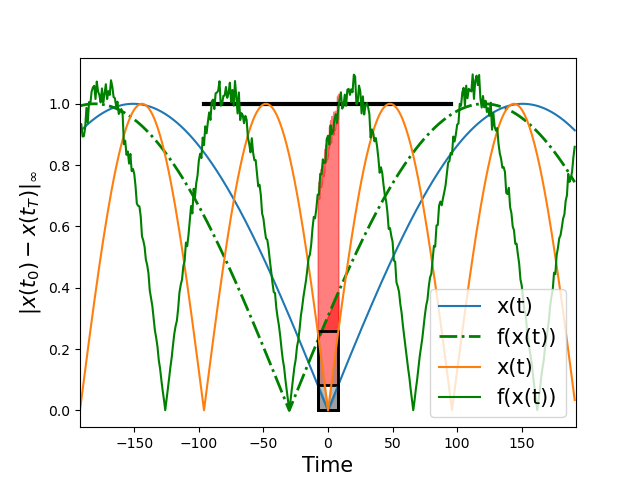

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint

def f(x):
    return np.abs(np.sin (2 * 3.141 * x/(96 * 2))) * (1 + np.random.sample((x).shape) * 0.0)

def f_shifted(x, pred_horiz):
    return f(x-pred_horiz) * (1 + np.random.sample(f(x).shape) * 0.1)

plt.xlim(-96*2, 96*2)  # Adjusted x-axis limits


for input_length in [8]:
    for pred_horiz in [-30]:

        box_x = np.linspace(-input_length, input_length, 100)
        max_value = np.max(f(box_x))

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k-', linewidth=2)  # Top line
        plt.plot([box_x[0], box_x[-1]], [np.min(f(box_x)), np.min(f(box_x))], 'k-', linewidth=2)  # Bottom line
        plt.plot([box_x[0], box_x[0]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Left line
        plt.plot([box_x[-1], box_x[-1]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, np.min(f(box_x)), f(box_x), where=(box_y > f(box_x)), color='gray', alpha=0.5)

        x = np.arange(-96*2, 96*2, 1)
    
        copy_box_x = np.array(box_x)
        plt.plot(x, f(x), label="x(t)")


        ###############################

        box_x = np.linspace(-input_length, input_length, 100)
        f_shifted_box_x = f_shifted(box_x, pred_horiz) 
        sprint(f_shifted_box_x.shape)
        
        max_value = np.max(f_shifted_box_x)

        box_y = np.full_like(box_x, max_value)

        # Plot the rectangle
        # plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k--', linewidth=1)  # Top line
        # plt.plot([box_x[0], box_x[-1]], [np.min(f_shifted_box_x), np.min(f_shifted_box_x)], 'k--', linewidth=1)  # Bottom line
        # plt.plot([box_x[0], box_x[0]], [np.min(f_shifted_box_x), max_value], 'k--', linewidth=1)  # Left line
        # plt.plot([box_x[-1], box_x[-1]], [np.min(f_shifted_box_x), max_value], 'k--', linewidth=1)  # Right line

        # Shade the area below the curve within the box
        plt.fill_between(box_x, , f_shifted_box_x, where= (np.max(f(box_x)) < f_shifted_box_x), color='red', alpha=0.5)

    
        plt.plot(x, f_shifted(x, pred_horiz), label=r"f(x(t))", alpha=1, color="green")

        plt.xlabel("Time", fontsize=15)
        plt.ylabel(r"$|x(t_0) - x(t_T)|_\infty$", fontsize=15)
        plt.legend(loc=4, fontsize=15)
        plt.savefig("csr_with_sine_shift.png")        
        plt.show()


IntSlider(value=8, description='Look back/ahead window', max=20, min=1)

IntSlider(value=-30, description='Prediction Horizon', max=0, min=-50)

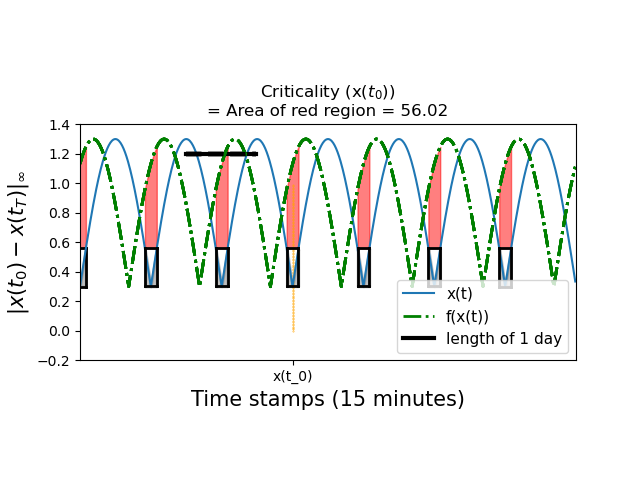

In [108]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from scipy.integrate import quad


def f(x):
    return np.abs(np.sin (2 * 3.141 * x/(96 * 2))) * (1 + np.random.sample((x).shape) * 0.0) + 0.3

def f_shifted(x, pred_horiz):
    return f(x-pred_horiz) * (1 + np.random.sample(f(x).shape) * 0.0) 


import time
# Function to generate data
def generate_data(length):
    # Generate data here
    pass


current_plot = plt.gca() 

def plot_with_slider(input_length, pred_horiz):
    plt.clf()
    plt.xlim(-96*3, 96*4)  # Adjusted x-axis limits
    
    for input_length in [input_length]:
        for pred_horiz in [pred_horiz]:
                        ###############################
            for days in range(-3, 4):
                box_x = np.linspace(-input_length + days * 96 , input_length + days * 96, 100)
                max_value = np.max(f(box_x))

                box_y = np.full_like(box_x, max_value)

                # Plot the rectangle
                plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k-', linewidth=2)  # Top line
                plt.plot([box_x[0], box_x[-1]], [np.min(f(box_x)), np.min(f(box_x))], 'k-', linewidth=2)  # Bottom line
                plt.plot([box_x[0], box_x[0]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Left line
                plt.plot([box_x[-1], box_x[-1]], [np.min(f(box_x)), max_value], 'k-', linewidth=2)  # Right line

                # Shade the area below the curve within the box
                plt.fill_between(box_x, np.min(f(box_x)), f(box_x), where=(box_y > f(box_x)), color='gray', alpha=0.5, linewidth=2)

                x = np.arange(-96*3, 96*4, 1)

                copy_box_x = np.array(box_x)
                
                if days == -3:
                    plt.plot(x, f(x), label="x(t)")

                
                box_x = np.linspace(-input_length + days * 96, input_length + days * 96, 100)
                f_shifted_box_x = f_shifted(box_x, pred_horiz) 
                # sprint(f_shifted_box_x.shape)

                max_value = np.max(f_shifted_box_x)

                box_y = np.full_like(box_x, max_value)

                # Plot the rectangle
                # plt.plot([box_x[0], box_x[-1]], [max_value, max_value], 'k--', linewidth=1)  # Top line
                # plt.plot([box_x[0], box_x[-1]], [np.min(f_shifted_box_x), np.min(f_shifted_box_x)], 'k--', linewidth=1)  # Bottom line
                # plt.plot([box_x[0], box_x[0]], [np.min(f_shifted_box_x), max_value], 'k--', linewidth=1)  # Left line
                # plt.plot([box_x[-1], box_x[-1]], [np.min(f_shifted_box_x), max_value], 'k--', linewidth=1)  # Right line

                # Shade the area below the curve within the box
                max_ = np.max(f(box_x))
                plt.fill_between(box_x, max_, f_shifted_box_x, where= (max_ < f_shifted_box_x), color='red', alpha=0.5)
                a = np.sum( (f_shifted_box_x - max_)[(max_ < f_shifted_box_x)] )

                if days == -3: 
                    plt.plot(x, f_shifted(x, pred_horiz), '-.',label=r"f(x(t))", alpha=1, color="green", linewidth=2)

                    plt.plot(list(range(-96//2*3, -96//2*1)), np.array(list(range(-96//2*3, -96//2*1))) * 0 + 1.2, 
                         color="black", linewidth=3, label="length of 1 day")
                else:
                    plt.plot(x, f_shifted(x, pred_horiz), '-.', alpha=1, color="green", linewidth=2)

                    plt.plot(list(range(-96//2*3, -96//2*1)), np.array(list(range(-96//2*3, -96//2*1))) * 0 + 1.2, 
                         "--",color="black", linewidth=3)
                # plt.text(-48, 48, " 1 day ", fontsize=15,  bbox=dict(facecolor='red', alpha=0.5))
                
            plt.xlabel("Time stamps (15 minutes)", fontsize=15)
            plt.ylabel(r"$|x(t_0) - x(t_T)|_\infty$", fontsize=15)                
            plt.legend(loc=4, fontsize=11)
            plt.ylim(-0.2, 1.4)
            plt.scatter([0] * 100, np.arange(0, 1, 1 / 100), s=0.1, color="orange")
            if a > 0.2: 
                plt.title(r"Criticality (x$(t_0)$)" + "\n= Area of red region = " + str(round(a, 2)) )
            elif a < 0.2:
                plt.title(r"Criticality (x$(t_0)$)" + "\n= Area of red region = " + str(round(a, 2)) +"\nf(x): naive model")
            plt.gca().set_aspect(200)
            
            ax = plt.gca()
            ax.set_xticks([0])
            ax.set_xticklabels(["x(t_0)"])
            plt.show()


def on_value_change(change):
    input_length = input_length_slider.value
    pred_horiz = pred_horiz_slider.value
    plot_with_slider(input_length, pred_horiz)

input_length_slider = widgets.IntSlider(value=8, min=1, max=20, description='Look back/ahead window')
pred_horiz_slider = widgets.IntSlider(value=-30, min=-50, max=0, description='Prediction Horizon')

input_length_slider.observe(on_value_change, 'value')
pred_horiz_slider.observe(on_value_change, 'value')

display(input_length_slider)
display(pred_horiz_slider)

plot_with_slider(input_length_slider.value, pred_horiz_slider.value)


In [98]:
np.arange(-0.2, 1, 1.2 / 100).shape

(100,)

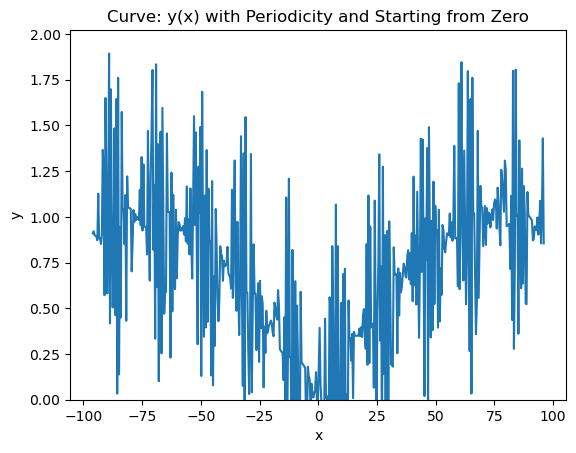

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from noise import pnoise1  # Perlin noise function from the `noise` library

# Set seed for reproducibility (optional)
# np.random.seed(42)

# Generate x-values
x = np.linspace(-96, 96, 500)  # Extended range for longer horizon

# Compute underlying curve with periodicity and starting from zero
underlying_curve = np.abs(np.sin(x/48))

# Compute smooth random offsets
smoothness = 0.98  # Controls the smoothness of the randomness
random_offsets = np.array([pnoise1(i / smoothness) for i in range(len(x))])

# Combine the underlying curve and random offsets
y = underlying_curve + random_offsets

# Plot the curve
plt.plot(x, y)

# Set the y-intercept to 0 by shifting the curve down
plt.ylim(bottom=0)

# Add labels and title
plt.xlabel('Temporal distance (h) unit: 15 minutes')
plt.ylabel('')
plt.title('Curve: y(x) with Periodicity and Starting from Zero')

# Display the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


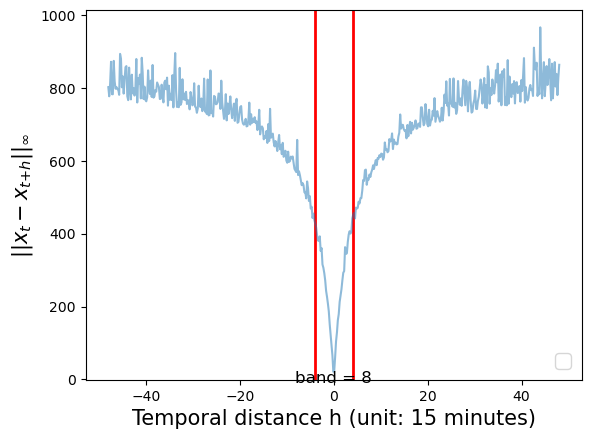

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from noise import pnoise1  # Perlin noise function from the `noise` library

# Set seed for reproducibility (optional)
np.random.seed(42)

# Generate x-values
x = np.linspace(-48, 48, 500)  # Extended range for longer horizon

# Compute underlying curve with periodicity and starting from zero
N = np.abs(x) / 4 + 1
underlying_curve = 10000 * np.abs(np.sin(x / (48 * N)))

# Compute smooth random offsets with varying smoothness
distance_from_zero = np.abs(x)
smoothness = (distance_from_zero + 0.01)  # Decrease smoothness as distance from zero increases
random_offsets = np.abs(np.random.normal(loc=0, scale=10, size=len(x))) * np.sqrt(smoothness)

# Combine the underlying curve and random offsets
y = underlying_curve + random_offsets

# Add vertical lines
plt.axvline(x=-4, color='r', linewidth=2)
plt.axvline(x=4, color='r', linewidth=2)

# Plot the curves
plt.plot(x, y, alpha=0.5, label='Lower Noise')
plt.plot(x, y + np.random.normal(loc=0, scale=20, size=len(x)), alpha=0.5, label='Higher Noise')

# Set the y-intercept to 0 by shifting the curve down
plt.ylim(bottom=-1)

# Add labels and title
plt.ylabel(r'$\|\|x_t-x_{t{+}h}\|\|_{\infty}$', fontsize=15)
plt.legend(fontsize=15, loc="lower right")
plt.xlabel(r"Temporal distance h (unit: 15 minutes)", fontsize=15)

# Display the plot
plt.show()


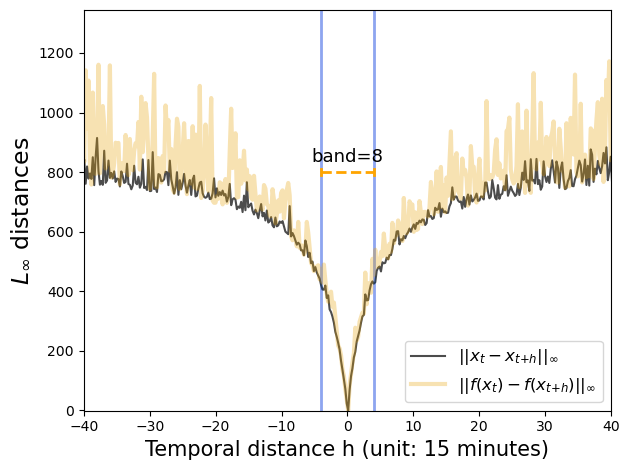

In [275]:
import numpy as np
import matplotlib.pyplot as plt
from noise import pnoise1  # Perlin noise function from the `noise` library

# Set seed for reproducibility (optional)
np.random.seed(42)

NN = 500

# Generate x-values
x = np.linspace(-54, 54, NN)  # Extended range for longer horizon

# Compute underlying curve with periodicity and starting from zero
N = np.abs(x) / 4 + 1
underlying_curve = 10000 * np.abs(np.sin(x / (48 * N)))
underlying_curve[NN//2] = 0 

# Compute smooth random offsets with varying smoothness
distance_from_zero = np.abs(x)
smoothness = (distance_from_zero)  # Decrease smoothness as distance from zero increases
random_offsets = np.abs(np.random.normal(loc=0, scale=10, size=len(x))) * np.sqrt(smoothness)
random_offsets[NN//2] = 0

# Combine the underlying curve and random offsets
y = underlying_curve + random_offsets

# Add vertical lines
plt.axvline(x=-4, color='blue', linewidth=2, alpha=0.3)
plt.axvline(x=4, color='blue', linewidth=2, alpha=0.3)

# Calculate the distance between the vertical red lines
band = np.abs(4 - (-4))

# Plot the curve 
plt.plot(x, y, alpha=0.7, color="black", label=r'$\|\|x_t-x_{t{+}h}\|\|_{\infty}$')


########## second point
# Compute smooth random offsets with varying smoothness
distance_from_zero = np.abs(x)
smoothness = (distance_from_zero + 0.01)  # Decrease smoothness as distance from zero increases
random_offsets = np.abs(np.random.normal(loc=0, scale=30, size=len(x))) * np.sqrt(smoothness)
random_offsets[NN//2] = 0

# Combine the underlying curve and random offsets
y = underlying_curve + random_offsets

# Add vertical lines
plt.axvline(x=-4, color='#0072B2', linewidth=2, alpha=0.2)
plt.axvline(x=4, color='#0072B2', linewidth=2, alpha=0.2)

# Calculate the distance between the vertical red lines
band = np.abs(4 - (-4))

# Plot the curve
plt.plot(x, y, alpha=0.3, color="#E69F00", label=r'$\|\|f(x_t)-f(x_{t{+}h})\|\|_{\infty}$', linewidth=3)


# Set the y-intercept to 0 by shifting the curve down
plt.ylim(bottom=-1)
plt.xlim(-40, 40)

# Add labels and title
plt.ylabel(r'$L_{\infty}$ distances', fontsize=17)
plt.legend(fontsize=12, loc="lower right")
plt.xlabel(r"Temporal distance h (unit: 15 minutes)", fontsize=15)

# Add a marker for the distance between the vertical lines
plt.text(0, 850, f'band={band}', fontsize=13, ha='center', va='center', color="black", alpha=1)
plt.plot([-4, 4], [800, 800], color='orange', linestyle='--', linewidth=2)
plt.plot([-4, -4], [790, 810], color='orange', linestyle='-', linewidth=2)
plt.plot([4, 4], [790, 810], color='orange', linestyle='-', linewidth=2)

# Display the plot
plt.tight_layout()
plt.savefig("fig_methods_main_1.png", dpi=300)
plt.show()

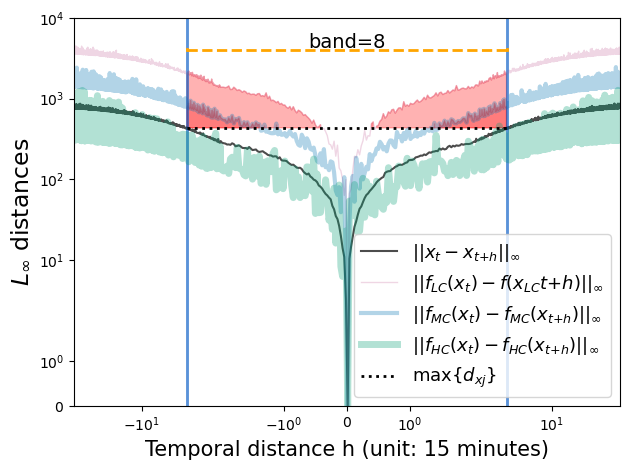

In [374]:
import numpy as np
import matplotlib.pyplot as plt
from noise import pnoise1  # Perlin noise function from the `noise` library

# Set seed for reproducibility (optional)
# np.random.seed(42)

NN = 4000
# Generate x-values
x = np.linspace(-54, 54, NN)  # Extended range for longer horizon


# Compute underlying curve with periodicity and starting from zero
N = np.abs(x) / 4 + 1
underlying_curve = 10000 * np.abs(np.sin(x / (48 * N)))
underlying_curve[NN//2] = 0 

# Compute smooth random offsets with varying smoothness
distance_from_zero = np.abs(x)
smoothness = (distance_from_zero) * 0.1 # Decrease smoothness as distance from zero increases
random_offsets = np.abs(np.random.normal(loc=0, scale=20, size=len(x))) * np.sqrt(smoothness)
random_offsets[NN//2] = 0

# Combine the underlying curve and random offsets
y = underlying_curve + random_offsets

# Add vertical lines
plt.axvline(x=-4, color='blue', linewidth=2, alpha=0.3)
plt.axvline(x=4, color='blue', linewidth=2, alpha=0.3)

# Calculate the distance between the vertical red lines
band = np.abs(4 - (-4))

# Plot the curve
plt.plot(x, y, alpha=0.7, color="black", label=r'$\|\|x_t-x_{t{+}h}\|\|_{\infty}$')


x_range = np.abs(x) <= 4
max_x_in_range = np.max(y[x_range])

########## second point
# Compute smooth random offsets with varying smoothness

N = np.abs(x) / 4 + 1
underlying_curve = 10000 * np.abs(np.sin(x / (10 * N)))
underlying_curve[NN//2] = 0 

distance_from_zero = np.abs(x)
smoothness = (distance_from_zero) + 1  # Decrease smoothness as distance from zero increases
random_offsets = abs(np.random.normal(loc=0, scale=50, size=len(x))) * np.sqrt(smoothness) 
random_offsets[NN//2] = 0

# Combine the underlying curve and random offsets
y = underlying_curve + random_offsets

# Add vertical lines
plt.axvline(x=-4, color='#0072B2', linewidth=2, alpha=0.2)
plt.axvline(x=4, color='#0072B2', linewidth=2, alpha=0.2)

# Calculate the distance between the vertical red lines
band = np.abs(4 - (-4))

# Plot the curve
plt.plot(x, y, alpha=0.3, color="#CC79A7", label=r'$\|\|f_{LC}(x_t)-f(x_{LC}{t{+}h})\|\|_{\infty}$', linewidth=1)


# Shade the region between the two curves within the range ±4
# plt.fill_between(x, max_x_in_range, y-max_x_in_range, where=(np.abs(x) <= 4), color='red', alpha=0.3)
plt.fill_between(x, [max_x_in_range] * x.shape[0], y, where=(x_range) & (y>max_x_in_range) , color='red', alpha=0.3)

# Set the y-intercept to 0 by shifting the curve down


# Add labels and title
plt.ylabel(r'$L_{\infty}$ distances', fontsize=17)
plt.xlabel(r"Temporal distance h (unit: 15 minutes)", fontsize=15)

# Add a marker for the distance between the vertical lines
# plt.text(0, 3002, f'band={band}', fontsize=14, ha='center', va='center', color="black", alpha=1)

# Add the horizontal line segment with markers
# plt.plot([-4, 4], [2400, 2400], color='orange', linestyle='--', linewidth=2)
# plt.plot([-4, -4], [2350, 2450], color='orange', linestyle='-', linewidth=2)
# plt.plot([4, 4], [2350, 2450], color='orange', linestyle='-', linewidth=2)



#########  THIRD POINT


########## second point
# Compute smooth random offsets with varying smoothness

N = np.abs(x) / 4 + 1
underlying_curve = 10000 * np.abs(np.sin(x / (26 * N)))
underlying_curve[NN//2] = 0 

distance_from_zero = np.abs(x)
smoothness = (distance_from_zero) + 1  # Decrease smoothness as distance from zero increases
random_offsets = abs(np.random.normal(loc=0, scale=50, size=len(x))) * np.sqrt(smoothness) 
random_offsets[NN//2] = 0

# Combine the underlying curve and random offsets
y = underlying_curve + random_offsets

# Add vertical lines
plt.axvline(x=-4, color='#0072B2', linewidth=2, alpha=0.2)
plt.axvline(x=4, color='#0072B2', linewidth=2, alpha=0.2)

# Calculate the distance between the vertical red lines
band = np.abs(4 - (-4))

# Plot the curve
plt.plot(x, y, alpha=0.3, color="#0072B2", label=r'$\|\|f_{MC}(x_t)-f_{MC}(x_{t{+}h})\|\|_{\infty}$', linewidth=3)


# Shade the region between the two curves within the range ±4
# plt.fill_between(x, max_x_in_range, y-max_x_in_range, where=(np.abs(x) <= 4), color='red', alpha=0.3)
plt.fill_between(x, [max_x_in_range] * x.shape[0], y, where=(x_range) & (y>max_x_in_range) , color='red', alpha=0.3)


# Add labels and title
plt.ylabel(r'$L_{\infty}$ distances', fontsize=17)
plt.xlabel(r"Temporal distance h (unit: 15 minutes)", fontsize=15)

# Add a marker for the distance between the vertical lines
# plt.text(0, 3002, f'band={band}', fontsize=14, ha='center', va='center', color="black", alpha=1)

# Add the horizontal line segment with markers
# plt.plot([-4, 4], [2400, 2400], color='orange', linestyle='--', linewidth=2)
# plt.plot([-4, -4], [2350, 2450], color='orange', linestyle='-', linewidth=2)
# plt.plot([4, 4], [2350, 2450], color='orange', linestyle='-', linewidth=2)





########## fourth point
# Compute smooth random offsets with varying smoothness

N = np.abs(x) / 4 + 1
underlying_curve = 10000 * np.abs(np.sin(x / (120 * N)))
underlying_curve[NN//2] = 0 

distance_from_zero = np.abs(x)
smoothness = (distance_from_zero) + 1  # Decrease smoothness as distance from zero increases
random_offsets = abs(np.random.normal(loc=0, scale=50, size=len(x))) * np.sqrt(smoothness) 
random_offsets[NN//2] = 0

# Combine the underlying curve and random offsets
y = underlying_curve + random_offsets

# Add vertical lines
plt.axvline(x=-4, color='#0072B2', linewidth=2, alpha=0.2)
plt.axvline(x=4, color='#0072B2', linewidth=2, alpha=0.2)

# Calculate the distance between the vertical red lines
band = np.abs(4 - (-4))

# Plot the curve
plt.plot(x, y, alpha=0.3, color="#009E73", label=r'$\|\|f_{HC}(x_t)-f_{HC}(x_{t{+}h})\|\|_{\infty}$', linewidth=5)


# Shade the region between the two curves within the range ±4
# plt.fill_between(x, max_x_in_range, y-max_x_in_range, where=(np.abs(x) <= 4), color='red', alpha=0.3)
plt.fill_between(x, [max_x_in_range] * x.shape[0], y, where=(x_range) & (y>max_x_in_range) , color='red', alpha=0.3)

# Set the y-intercept to 0 by shifting the curve down
plt.ylim(bottom=-1)
plt.xlim(-40, 40)

# Add labels and title
plt.ylabel(r'$L_{\infty}$ distances', fontsize=17)
plt.xlabel(r"Temporal distance h (unit: 15 minutes)", fontsize=15)

# Add a marker for the distance between the vertical lines
# plt.text(0, 3002, f'band={band}', fontsize=14, ha='center', va='center', color="black", alpha=1)

# Add the horizontal line segment with markers
# plt.plot([-4, 4], [2400, 2400], color='orange', linestyle='--', linewidth=2)
# plt.plot([-4, -4], [2350, 2450], color='orange', linestyle='-', linewidth=2)
# plt.plot([4, 4], [2350, 2450], color='orange', linestyle='-', linewidth=2)






plt.plot([-4, 4], [max_x_in_range, max_x_in_range], color='black', linestyle=':', linewidth=2, label=r"max$\{d_{xj}\}$")
plt.legend(fontsize=13, loc="lower right")

# Add a marker for the distance between the vertical lines
plt.text(0, 4898, f'band={band}', fontsize=14, ha='center', va='center', color="black", alpha=1)
plt.plot([-4, 4], [4000, 4000], color='orange', linestyle='--', linewidth=2)
plt.plot([-4, -4], [3950, 4050], color='orange', linestyle='-', linewidth=2)
plt.plot([4, 4], [3950, 4050], color='orange', linestyle='-', linewidth=2)

# Set the y-intercept to 0 by shifting the curve down
plt.ylim(0, 10000)
# plt.xlim(-40, 40)


plt.yscale('symlog')
plt.xscale('symlog')
# Display the plot
plt.tight_layout()
plt.savefig("fig_methods_main_2.png", dpi=300)
plt.show()


In [321]:
max_x_in_range

414.6412496302399

In [212]:
(y>max_x_in_range)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [211]:
x_range

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [198]:
x.shape

(500,)